<a href="https://colab.research.google.com/github/silverfuryK/audio-to-sheet/blob/main/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mido
!pip install pygame
!pip install music21

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import os
import math
import numpy as np
import pandas as pd
from mido import MidiFile
import pygame
import IPython
import matplotlib.pyplot as plt
import librosa.display
import librosa
from music21 import *

pygame 2.0.1 (SDL 2.0.14, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
np_data = np.load(open('/gdrive/MyDrive/MusicNet/musicnet.npz','rb'))


In [5]:
#data=pd.read_csv('/content/2106.csv')
data=pd.read_csv('/gdrive/MyDrive/MusicNet/2106.csv')
#data=pd.read_csv('/gdrive/MyDrive/MusicNet/2416.csv')

data.head()

,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,9694,11742,41,61,4.875,0.108333,Thirty Second
1,11742,34270,41,62,5.000,0.975000,Quarter
2,34270,53725,42,54,6.000,0.975000,Quarter
3,34270,53725,43,50,6.000,0.975000,Quarter
4,34270,53725,41,57,6.000,0.975000,Quarter


In [ ]:
# notes_arr =np.zero([end_sample-start_sample,100,120])
# if st_note<start_sample:
#    pass

# notes_arr[st_note:et_note,intrument,note] = 1

In [5]:
data.get()

TypeError: ignored

In [5]:
len(data)

2004

In [41]:
list(data.value_counts('instrument'))

[725, 416, 245]

In [6]:
num_instru = len(data.value_counts('instrument'))
print(num_instru)

3


In [7]:
list(data.value_counts('instrument'))

[1191, 458, 355]

In [6]:
#x, sr = librosa.load('/content/2106.wav')
x, sr = librosa.load('/gdrive/MyDrive/MusicNet/2106.wav',sr=44100)

In [47]:
print(x.shape)
print(sr)

(9995520,)
44100


In [48]:
def csv_to_array(path, num_samples):
    df = pd.read_csv(path)
    START_TIME = df.start_time[0]
    END_TIME = list(df.end_time)[-1]
    INTERVAL_LENGTH = (END_TIME - START_TIME)/num_samples
    instruments = df.instrument.unique()                       #list of instruments
    
    inst_dict = {}
    i = 0
    for inst in df.instrument:
        inst_dict.setdefault(inst,[]).append([df.start_time[i], df.end_time[i], df.note[i]]) 
        i = i+1
        
    A = np.zeros((num_samples, 100, 120))
    instruments = df.instrument.unique()
    for inst in instruments:
        for curr in inst_dict[inst]:
            i = math.floor((curr[0] - START_TIME)/INTERVAL_LENGTH)       #curr[0] == current start time
            j = math.floor((curr[1] - START_TIME)/INTERVAL_LENGTH)       #curr[1] == current end time
            if  curr[1] == END_TIME:
                j = j-1
            for sample_idx in range(i, j+1):
                A[sample_idx][inst][curr[2]-1] = curr[2]                         #curr[2] == current note
    return A

In [ ]:
#A = csv_to_array('/gdrive/MyDrive/MusicNet/2106.csv',10000)
A = csv_to_array('/gdrive/MyDrive/MusicNet/2416.csv',9995520)

In [50]:
np.shape(A[:,42,:][0])

(120,)

In [ ]:
plt.plot(A[:,61,:],'o')

In [45]:
import sys
sys.getsizeof(A)

960000128

In [ ]:
samples = 
notes_occupied = np.zeros((120),dtype=int)
inst = list(data.value_counts('instrument'))
num_instru = len(data.value_counts('instrument'))
notes = np.zeros([len(x),num_instru,120])

for i in range(len(data)):
  curr_ins = data.get('instrument')[i]
  inst_index = inst.inde
  curr_note = data.get('note')[i]
  curr_st = data.get('start_time')[i]
  curr_et = data.get('start_time')[i]
  




In [ ]:
notes_occupied = np.zeros((120),dtype=int)
inst = list(data.value_counts('instrument'))
num_instru = len(data.value_counts('instrument'))
notes = np.zeros([len(x),num_instru,120])

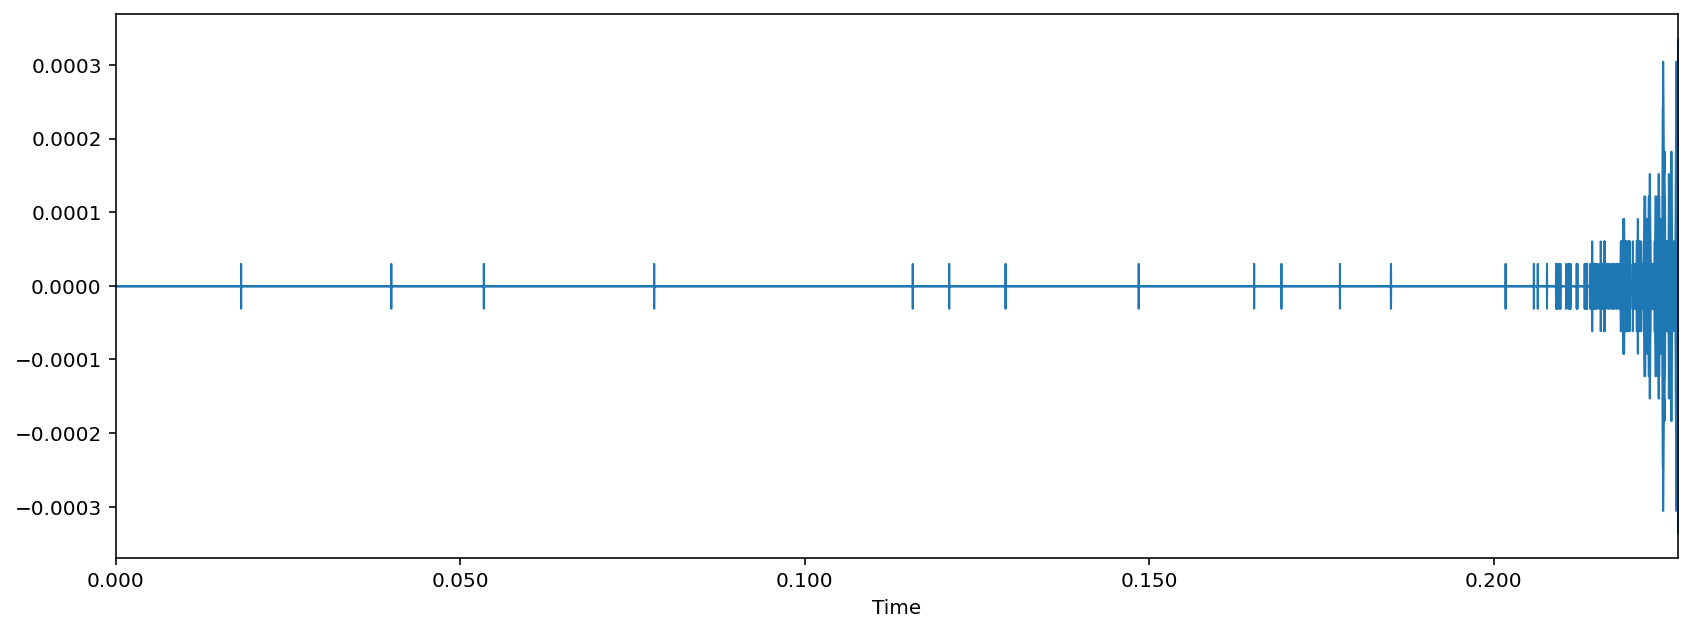

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[0:10000], sr=sr)

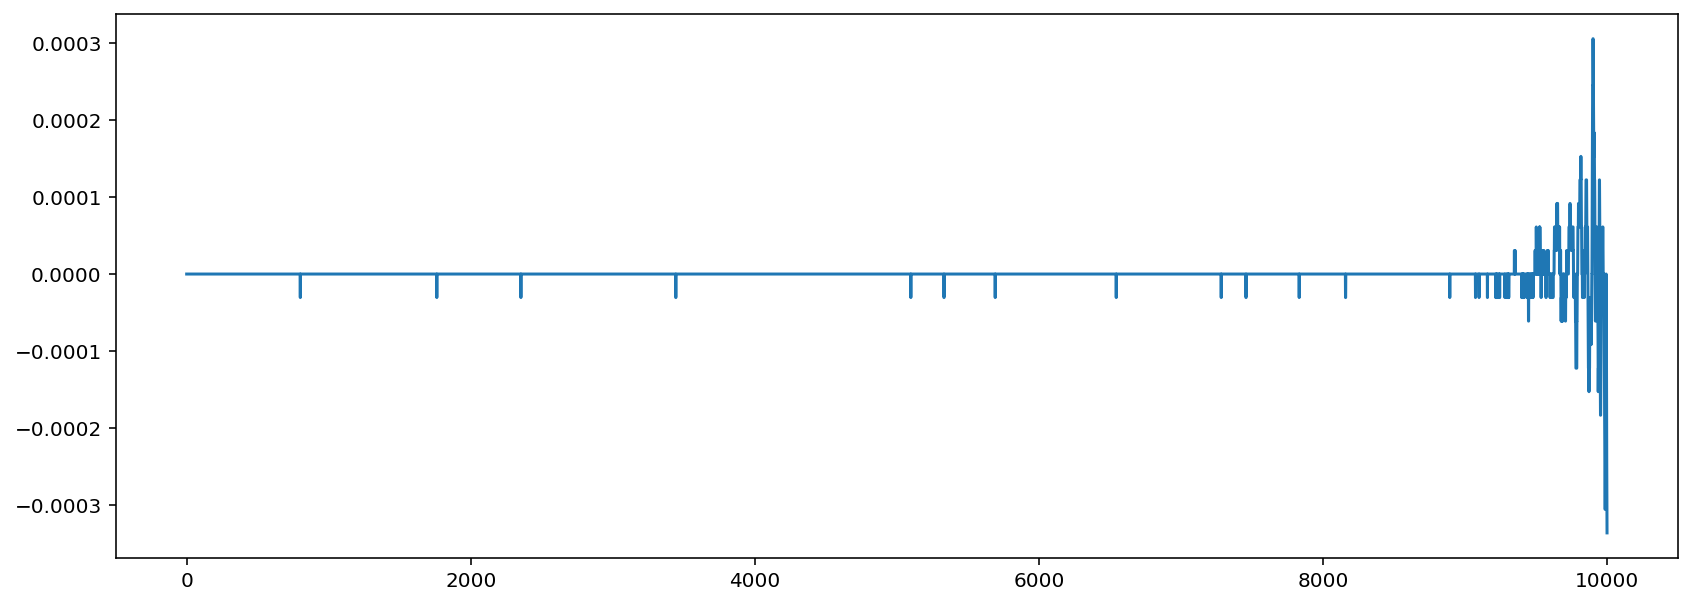

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(x[0:10000])

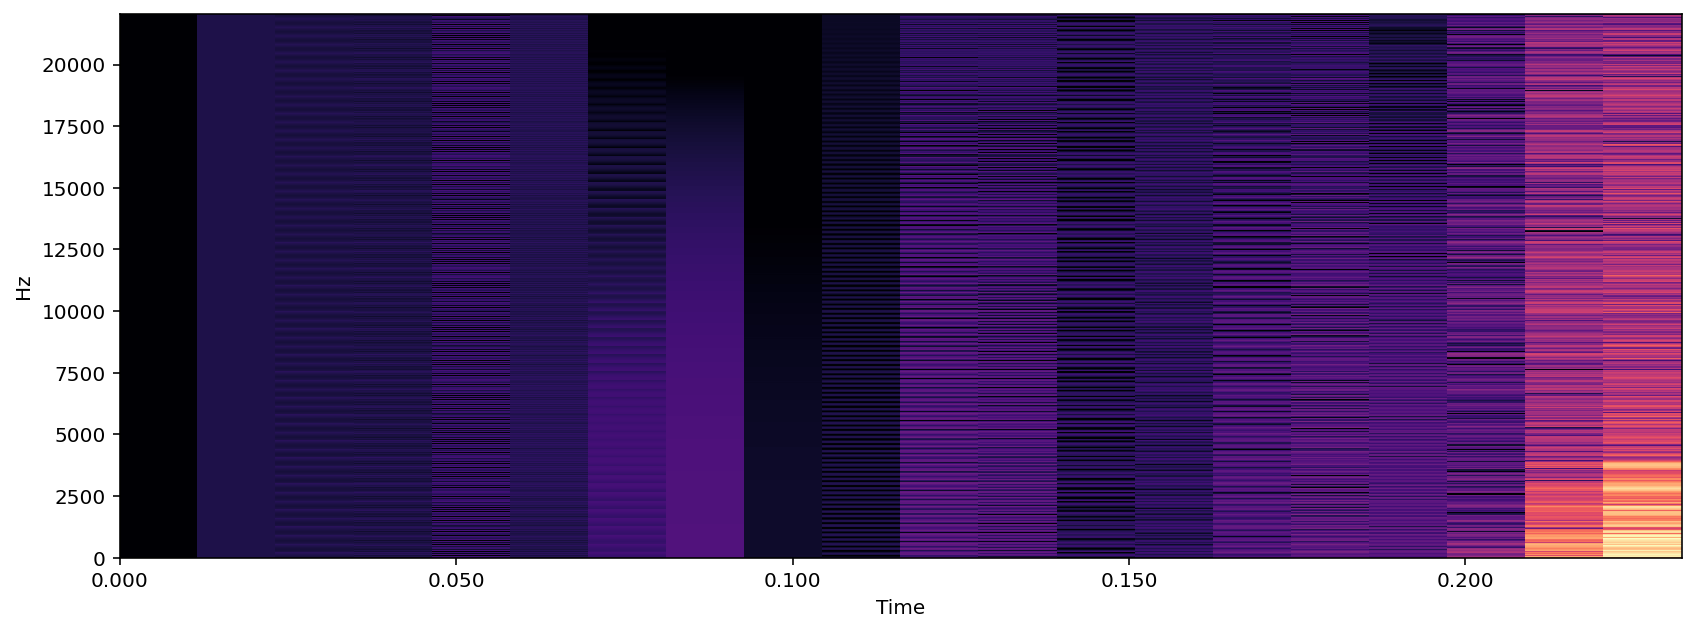

In [9]:
X = librosa.stft(x[0:10000])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=44100, x_axis='time', y_axis='hz')

In [11]:
np.shape(x)

(2490361,)

In [13]:
np.shape(data)

(2004, 7)

In [22]:
instruments = pd.DataFrame.get(data,'instrument')
max(instruments)

43

In [ ]:
max_instrument = max(instruments)
for i in len(x)

In [112]:
notes = np.zeros([len(x),num_instru,120])

In [80]:
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    all_notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
    print(len(s2))

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        #if 'Piano' in str(part): 
        for i in range(int(len(s2))):
        
            notes_to_parse = part.recurse() 
            notes = []
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))
            all_notes.append(notes)

    return np.array(all_notes)

In [ ]:
#specify the path
path='/content/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

In [ ]:
np.shape(notes_array)

In [ ]:
read_midi('/content/2106.mid')

In [ ]:
notes_array[0]

In [78]:
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

24


In [61]:
s2

NameError: ignored

In [95]:

# END CSV shape = [total_samples, number of intruments, 120]
